<h1 style='color:DarkBlue' align='center'> Mercedes-Benz Greener competetion

**In this project our job is to predict how long a car on a production line will take to pass the testing phase.**
* Dataset contains masked features which are representing various tests and each row represents a seperate car
* target column is y which represents the time taken by car to pass test in seconds


In [1]:
#Lets import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import seaborn as sns
import math as m
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from pylab import rcParams

Using TensorFlow backend.


In [2]:
#reading the dataset
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
# #looking at the data types
# df.dtypes.value_counts()

we have 4208 rows and 378 columns with  1 float , 369 int and 8 object(categorical) values

In [5]:
#data the has lots of features so setting options to view all columns
pd.options.display.max_columns = 400

In [6]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

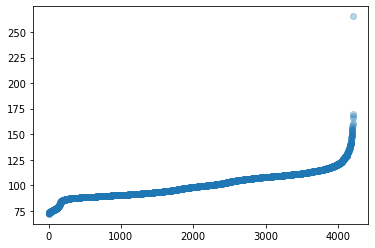

In [7]:
#checking the target variable 
plt.scatter(range(len(df)), np.sort(df.y.values), alpha=0.3)

In [8]:
#time at 250 eventough it is a valid datapoint but it is far away from rest datapoints so we will remove it treating it as an outlier in target column
#if not so, then it will affect our regression analysis.
df=df[df.y<225]

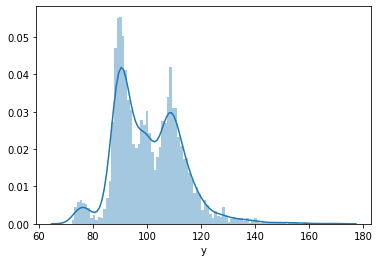

In [9]:
#lets explore the distribution of data points
sns.distplot(df.y, bins=100, kde=True)

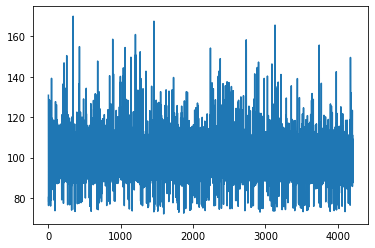

In [10]:
plt.plot(df.y)
#this line plot shows there is no trend assosiated with our target variables it means no time series data
#we will focus on regression algorithm

Checking for missing values as columns are larger in number it will not display all columns so to have a look on missing values we can filter missing columns or we can loop it

In [11]:
miss_value_columns=df.isnull().sum()
miss_value_columns[miss_value_columns>0]

Series([], dtype: int64)

As list contains none value this indicates we don't have any missing value

**Lets see what our fetures contains and wich features are categorical and which are numerical**

In [12]:
cols = df.columns.drop('y')

In [13]:
n_unique=[]
number_of_unique=[]
for col in cols:
    n_unique.append(df[col].unique())
    number_of_unique.append(df[col].nunique())

In [14]:
feature_data=pd.DataFrame([number_of_unique,n_unique],columns=cols,index=['no of unique','unique datapoints in columns'])
feature_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
no of unique,4208,47,27,44,7,4,29,12,25,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
unique datapoints in columns,"[0, 6, 7, 9, 13, 18, 24, 25, 27, 30, 31, 32, 3...","[k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ...","[v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,...","[at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,...","[a, e, c, f, d, b, g]","[d, b, c, a]","[u, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,...","[j, l, d, h, i, a, g, c, k, e, f, b]","[o, x, e, n, s, a, h, p, m, k, d, i, v, j, b, ...","[0, 1]",[0],"[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]",[0],"[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]",[0],"[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[1, 0]","[0, 1]","[1, 0]","[1, 0]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 

In [15]:
feature_data.T[feature_data.T['no of unique']==1]

,no of unique,unique datapoints in columns
X11,1,[0]
X93,1,[0]
X107,1,[0]
X233,1,[0]
X235,1,[0]
X268,1,[0]
X289,1,[0]
X290,1,[0]
X293,1,[0]
X297,1,[0]


### From above we are clear there are some features containing only single value. The features with no variance are of no use at all. so,we will drop it

**Another approach to find zero variance features is by calculating variance of features so that we can drop the features that contains zero variance**

In [16]:
feature_data_var_df = pd.DataFrame(df.var(axis=0))
feature_data_var_df[feature_data_var_df[0]==0]

,0
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


In [19]:
#lest define the list of columns to drop
cols_to_drop=pd.Series.tolist(feature_data_var_df[feature_data_var_df[0]==0].index)
cols_to_drop

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [18]:
#lets drop the columns not required from drop list
df=df.drop(cols_to_drop,axis=1)
print(df.shape)

(4208, 366)


In [22]:
#Dropping duplicates in dataset
df = df.drop_duplicates()
df.shape

(4208, 366)

In [28]:
#lets one hot encode the categorical variables
df_final=pd.get_dummies(df,drop_first=True)
df_final.shape

(4208, 545)

In [29]:
df_final.head()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,...,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_aa,X2_ac,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_b,X4_c,X4_d,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0

## Performing PCA to reduce dimensions

In [31]:
#lets seperate features and target to perform PCA
#we can ignore ID if it is just because of train test random split for competetion as it doesn't add any value and it has no relation with our target
features=df_final.drop(['ID','y'],axis=1)
label=df_final['y']
features.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,...,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_aa,X2_ac,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_b,X4_c,X4_d,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0

In [32]:
#scaling the data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.11613559, -0.28494243,  4.0306205 , ..., -0.22102814,
        -0.15997197, -0.16836863],
       [-0.11613559, -0.28494243, -0.24810076, ..., -0.22102814,
        -0.15997197, -0.16836863],
       [-0.11613559, -0.28494243, -0.24810076, ..., -0.22102814,
         6.25109514, -0.16836863],
       ...,
       [-0.11613559,  3.50948083,  4.0306205 , ..., -0.22102814,
        -0.15997197, -0.16836863],
       [-0.11613559, -0.28494243, -0.24810076, ..., -0.22102814,
        -0.15997197, -0.16836863],
       [-0.11613559, -0.28494243, -0.24810076, ...,  4.52431075,
        -0.15997197, -0.16836863]])

In [33]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=0.90)
pca.fit(features_scaled)

features_after_pca = pca.transform(features_scaled)
features_after_pca.shape

(4208, 202)

## Modelling

In [38]:
#train, test split(we will validate our model on 20%test data and will build model with CV)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_after_pca, label, test_size=0.2, random_state=32)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,ShuffleSplit,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

cv_split = ShuffleSplit(n_splits = 10, test_size = 0.1, train_size = 0.9, random_state = 0)
pipeline = Pipeline([
     ('clf', LinearRegression()) #step2 - classifier
])
pipeline.steps

clfs = []
clfs.append(LinearRegression())
clfs.append(SVR())
clfs.append(ElasticNet())
clfs.append(Lasso()) 
# clfs.append(DecisionTreeRegressor())
clfs.append(RandomForestRegressor())
# clfs.append(ExtraTreesRegressor())               
# clfs.append(AdaBoostRegressor())                 
clfs.append(XGBRegressor())

results=[]
results1=[]
results2=[]
results3=[]
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=cv_split, return_train_score=True)
    #default parameter fit for comparision with CV Score and Default fit score
    pipeline.set_params(clf = classifier)
    pipeline.fit(X_train,y_train)
    train_acc=pipeline.score(X_train, y_train)
    test_acc=pipeline.score(X_test, y_test)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            if key=='test_score':
                results.append({'Test_mean_Score': values.mean(), 'Test_Std': values.std()})
    for key, values in scores.items():
            if key=='train_score':
                results1.append({'Train_mean_Score': values.mean(), 'Train_Std': values.std()})
    for key, values in scores.items():
            if key=='fit_time':
                results2.append({'Fit_time': values.mean()})

    results3.append({'Def_Train_score':train_acc,'Def_Test_score':test_acc})

---------------------------------
LinearRegression()
-----------------------------------
---------------------------------
SVR()
-----------------------------------
---------------------------------
ElasticNet()
-----------------------------------
---------------------------------
Lasso()
-----------------------------------
---------------------------------
RandomForestRegressor()
-----------------------------------
[04:47:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regres

In [42]:
from sklearn.metrics import mean_squared_error

In [63]:
results=pd.DataFrame(results,index=['LR','SVR','EN','LS','RFR','XGB'])
results1=pd.DataFrame(results1,index=['LR','SVR','EN','LS','RFR','XGB'])
results2=pd.DataFrame(results2,index=['LR','SVR','EN','LS','RFR','XGB'])
results3=pd.DataFrame(results3,index=['LR','SVR','EN','LS','RFR','XGB'])

In [64]:
Compare_models=pd.concat((results1,results,results3),axis=1)
Compare_models.sort_values(by='Test_mean_Score',ascending=False)

,Train_mean_Score,Train_Std,Test_mean_Score,Test_Std,Def_Train_score,Def_Test_score
XGB,0.709763,0.005302,0.548874,0.044640,0.696992,0.525450
EN,0.544796,0.004554,0.545397,0.041395,0.545301,0.504579
RFR,0.911178,0.001862,0.521077,0.050133,0.910700,0.474745
LS,0.500820,0.004736,0.509822,0.043863,0.502220,0.470712
SVR,0.502142,0.004737,0.480898,0.045087,0.508122,0.444344
LR,0.631235,0.006219,-0.125904,0.891850,0.628914,0.525769


we are getting maximum test accuracy with XGBoost regressor so we will tune same and see is there any improvement or not

In [66]:
pipeline.set_params(clf= XGBRegressor())
pipeline.steps

[('clf', XGBRegressor())]

In [68]:
  
param_grid = {
    'clf__learning_rate' : np.linspace(0.01,0.2),
    'clf__n_estimators' : [20,35,55,75,85,95],
    'clf__random_state': np.arange(1,50),
    'clf__max_depth': [3,4,5,6,7,8,10]
}


In [69]:
xgb_grid = RandomizedSearchCV(pipeline, param_grid, cv=cv_split, n_iter = 10)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

[05:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:12] WARNI

[05:12:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:10] WARNI

[05:15:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'clf__random_state': 36,
 'clf__n_estimators': 75,
 'clf__max_depth': 4,
 'clf__learning_rate': 0.07979591836734694}

In [70]:
xgb_grid=xgb_grid.best_estimator_

In [82]:
y_predict1 = xgb_grid.predict(X_test)

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

In [85]:
r_square_score =  r2_score(y_test, y_predict1)
print('r_square_score: {0}'.format(r_square_score))

r_square_score: 0.5217927407536491


In [88]:
adjusted_r_squared = 1 - (1-r_square_score)*(len(y_predict1)-1)/(len(y_predict1)-X_test.shape[1]-1)
adjusted_r_squared
print('adjusted_r_squared: {0}'.format(adjusted_r_squared))

adjusted_r_squared: 0.37062237085104677


**Difference between R2 and adjusted R2 value indicates that still irrelevent fetuures present in dataset which are of no use in short having no significant p value to remain in features for regression**

In [87]:
MSE=mean_squared_error(y_test, y_predict1)
print('mean_squared_error: {0}'.format(MSE))

mean_squared_error: 76.4282192303592


In [97]:
pd.DataFrame(y_predict1,y_test)

,0
y,
90.38,93.246475
94.09,93.097961
85.99,93.442924
89.89,94.642944
113.69,111.753296
...,...
100.10,93.575714
127.42,116.217148
97.75,92.036255


In [110]:
print(xgb_grid.named_steps["clf"].feature_importances_)

[0.02049805 0.06832466 0.02493283 0.01793213 0.03099572 0.0274979
 0.01258952 0.00444673 0.00466746 0.00328598 0.0054767  0.00344266
 0.00208868 0.0021953  0.02112039 0.00340538 0.00117654 0.00587444
 0.01948582 0.00801017 0.00572367 0.00942078 0.01021592 0.0003302
 0.00692794 0.00803892 0.01549375 0.00713669 0.01148126 0.0164728
 0.00430571 0.00047769 0.00411928 0.00355013 0.00706172 0.00377451
 0.00579962 0.00528542 0.00488224 0.00261983 0.00752653 0.00219964
 0.         0.01172977 0.00373348 0.00116393 0.         0.00570648
 0.00589226 0.01083401 0.00274898 0.         0.00459006 0.00599686
 0.         0.00481177 0.00235433 0.00270987 0.00302708 0.00552195
 0.00577964 0.         0.00399589 0.00179297 0.00760324 0.00797278
 0.00610681 0.006194   0.00415443 0.00342398 0.00207749 0.00483085
 0.0039163  0.         0.00471383 0.00483152 0.00378587 0.00142244
 0.00230752 0.00405377 0.00468624 0.         0.0032996  0.00500369
 0.00182015 0.00494655 0.00390644 0.00478016 0.00592507 0.0063804